In [2]:
import pandas as pd
import numpy as np
#import math
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
from datetime import datetime 
import datetime
from IPython.display import display, HTML, clear_output
import gc
import seaborn as sns
from scipy.stats import normaltest, boxcox, probplot
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix
#from random import shuffle
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
#from sklearn.metrics import f1_score, balanced_accuracy_score
from statsmodels.tsa.stattools import adfuller

In [3]:
dhh_max = r'C:\Users\ing_l\Tesis grado\Data\Predictors data\Dataset2019_half_hour_max.csv'
dhour_max = r'C:\Users\ing_l\Tesis grado\Data\Predictors data\Dataset2019_hour_max.csv'
dhh_mean = r'C:\Users\ing_l\Tesis grado\Data\Predictors data\Dataset2019_half_hour_mean.csv'
dhour_mean = r'C:\Users\ing_l\Tesis grado\Data\Predictors data\Dataset2019_hour_mean.csv'

In [4]:
data = pd.read_csv(dhh_max)
data.drop('Unnamed: 0', axis=1, inplace=True)
data['fecha'] = data['fecha'].apply(lambda x: pd.to_datetime(x).date())
data

,dia de la semana,fecha,id_cuadra,media hora,mes,ocupacion,ocupacion anterior,targets
0,2,2019-01-02,0,36000,1,2,3,1
1,2,2019-01-02,0,37800,1,1,2,5
2,2,2019-01-02,0,39600,1,5,1,4
3,2,2019-01-02,0,41400,1,4,5,2
4,2,2019-01-02,0,43200,1,2,4,3
...,...,...,...,...,...,...,...,...
476452,1,2019-09-17,190,39600,9,1,1,1
476453,1,2019-09-17,190,41400,9,1,1,1
476454,1,2019-11-12,190,36000,11,0,0,1
476455,1,2019-11-19,190,34200,11,1,1,1


In [5]:
data.groupby(by=['fecha', 'media hora']).mean().sort_values(by=['fecha','media hora']).reset_index()

,fecha,media hora,dia de la semana,id_cuadra,mes,ocupacion,ocupacion anterior,targets
0,2019-01-02,27000,2.0,46.000000,1.0,2.500000,1.000000,2.500000
1,2019-01-02,28800,2.0,27.750000,1.0,2.250000,1.750000,4.750000
2,2019-01-02,30600,2.0,51.333333,1.0,1.833333,0.833333,2.666667
3,2019-01-02,32400,2.0,35.421053,1.0,2.157895,1.526316,4.105263
4,2019-01-02,34200,2.0,39.361702,1.0,3.553191,1.765957,4.914894
...,...,...,...,...,...,...,...,...
8898,2019-12-31,59400,1.0,28.900000,12.0,2.900000,2.400000,2.500000
8899,2019-12-31,61200,1.0,28.300000,12.0,1.900000,1.600000,1.400000
8900,2019-12-31,63000,1.0,21.166667,12.0,3.166667,3.000000,2.500000
8901,2019-12-31,64800,1.0,39.333333,12.0,3.333333,3.666667,3.666667


In [6]:
def to_time(x):
    t = (x/(1800*2))
    t_int = int(t)
    if t % 2 > 0:
        return datetime.time(t_int, 30)
    else:
        return datetime.time(t_int)
    
data['tiempo'] = data['media hora'].apply(lambda x: to_time(x))

In [7]:
data

,dia de la semana,fecha,id_cuadra,media hora,mes,ocupacion,ocupacion anterior,targets,tiempo
0,2,2019-01-02,0,36000,1,2,3,1,10:00:00
1,2,2019-01-02,0,37800,1,1,2,5,10:30:00
2,2,2019-01-02,0,39600,1,5,1,4,11:30:00
3,2,2019-01-02,0,41400,1,4,5,2,11:30:00
4,2,2019-01-02,0,43200,1,2,4,3,12:00:00
...,...,...,...,...,...,...,...,...,...
476452,1,2019-09-17,190,39600,9,1,1,1,11:30:00
476453,1,2019-09-17,190,41400,9,1,1,1,11:30:00
476454,1,2019-11-12,190,36000,11,0,0,1,10:00:00
476455,1,2019-11-19,190,34200,11,1,1,1,09:30:00


In [8]:
def to_date_time(x):
    return datetime.datetime.combine(x['fecha'], x['tiempo']) 
    
data['fecha_tiempo'] = data[['fecha','tiempo']].apply(to_date_time, axis=1)
data

,dia de la semana,fecha,id_cuadra,media hora,mes,ocupacion,ocupacion anterior,targets,tiempo,fecha_tiempo
0,2,2019-01-02,0,36000,1,2,3,1,10:00:00,2019-01-02 10:00:00
1,2,2019-01-02,0,37800,1,1,2,5,10:30:00,2019-01-02 10:30:00
2,2,2019-01-02,0,39600,1,5,1,4,11:30:00,2019-01-02 11:30:00
3,2,2019-01-02,0,41400,1,4,5,2,11:30:00,2019-01-02 11:30:00
4,2,2019-01-02,0,43200,1,2,4,3,12:00:00,2019-01-02 12:00:00
...,...,...,...,...,...,...,...,...,...,...
476452,1,2019-09-17,190,39600,9,1,1,1,11:30:00,2019-09-17 11:30:00
476453,1,2019-09-17,190,41400,9,1,1,1,11:30:00,2019-09-17 11:30:00
476454,1,2019-11-12,190,36000,11,0,0,1,10:00:00,2019-11-12 10:00:00
476455,1,2019-11-19,190,34200,11,1,1,1,09:30:00,2019-11-19 09:30:00


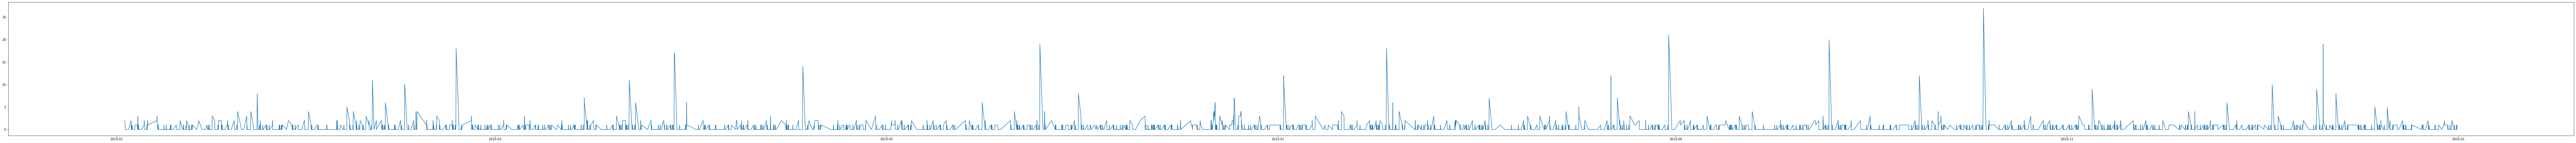

In [12]:
plt.plot(data.groupby(by=['fecha_tiempo']).max().sort_values(by=['fecha_tiempo']).reset_index()[['fecha_tiempo']], data.groupby(by=['fecha_tiempo']).max().sort_values(by=['fecha_tiempo']).reset_index()['ocupacion'])

plt.rcParams['figure.figsize'] = (150,8)

plt.show()

In [69]:
data = data.sort_values(by=['fecha_tiempo']).reset_index(drop=True)

In [19]:
#To see if data is stationary

result = adfuller(data['ocupacion'], maxlag=50)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -46.56829806467625
p-value: 0.0
Critical Values:
	1%: -3.4303637263914286
	5%: -2.861546066902784
	10%: -2.5667732291908503


In [18]:
gc.collect()

663

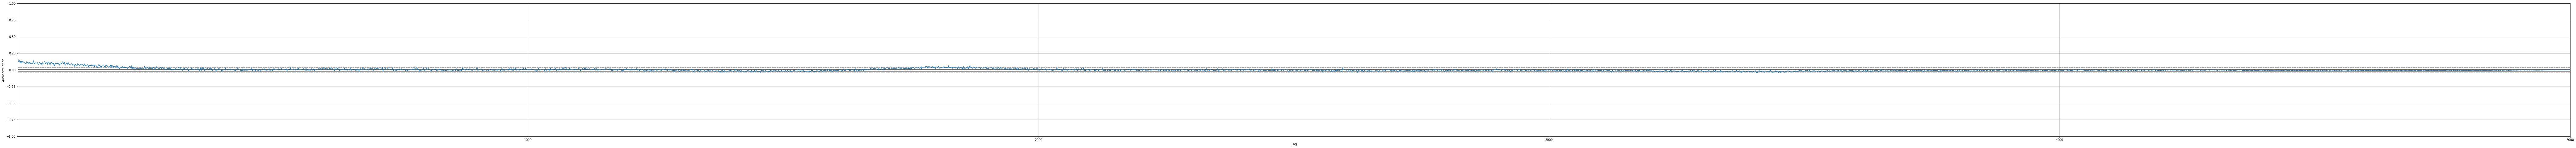

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['ocupacion'][0:5000])

In [74]:
train = data['ocupacion'][0:5000]
test = data['ocupacion'][5000:6000]

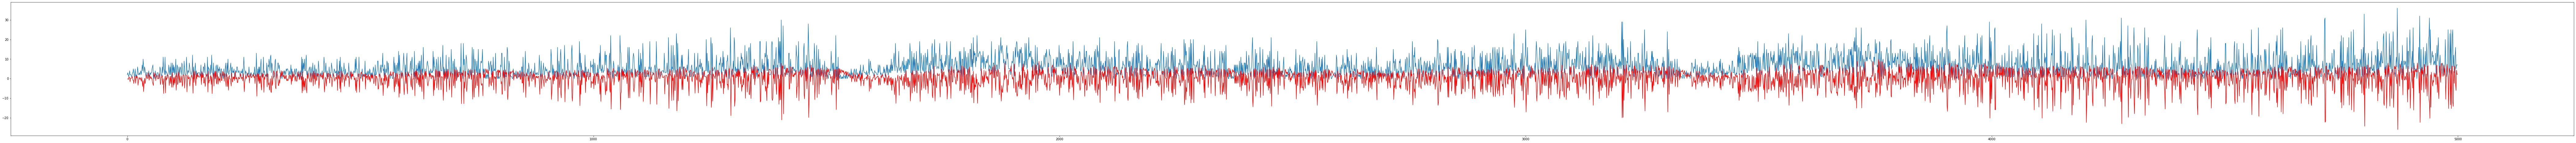

In [90]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(5,1,1))
results = model.fit(disp=-1)

plt.plot(train)
plt.plot(results.fittedvalues, color='red')

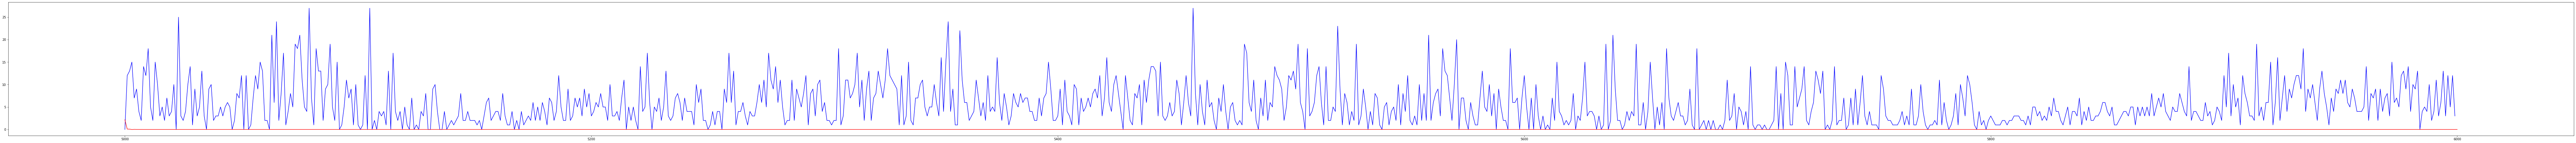

In [97]:
plt.plot(test, color='blue')
plt.plot(results.predict(start=5000, end=6000), color='red')

# Análisis datos estacionarios y correlación

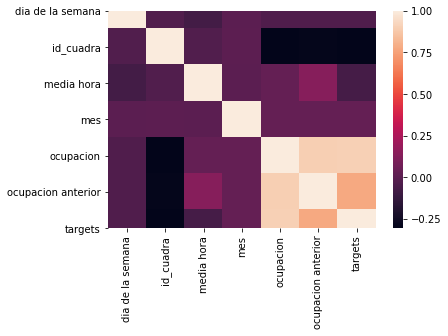

In [4]:
#Correlacion para dataset_hh
sns.heatmap(data.corr())

In [6]:
#Si tienen media y varianza parecida entonces es estacinoario
dsin_finde = data.loc[data['dia de la semana'] < 5]
separadores = [int(len(dsin_finde)/2), int(len(dsin_finde)/3) * 2]
var1, var2, var3 = dsin_finde[:separadores[0]]['ocupacion'], dsin_finde[separadores[0]:separadores[1]]['ocupacion'], dsin_finde[separadores[1]:]['ocupacion']
print(var1.mean(), var2.mean(), var3.mean())
print(var1.std(), var2.std(), var3.std())

7.468272459398341 5.610265964281125 4.709942887979493
5.6381965250105 4.569730528776953 4.190685698236125


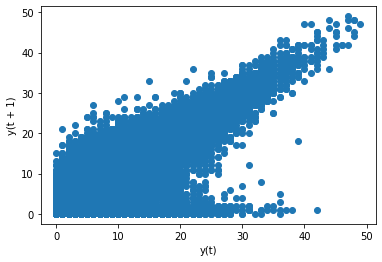

In [7]:
#Esto me dice que los datos estan relacionados y que estan fuertemente correlacionados
pd.plotting.lag_plot(data['ocupacion'])

In [8]:
gc.collect()

27

# Para ver si es una distribucion normal

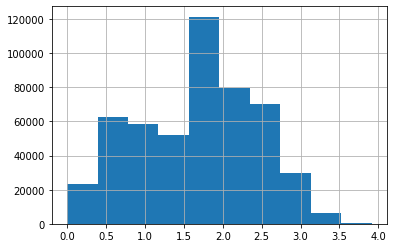

In [32]:
np.log(data['ocupacion']+1).hist()

In [33]:
normaltest(np.log(data['ocupacion']+1))

NormaltestResult(statistic=14187.33100914674, pvalue=0.0)